In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 1050)
import openpyxl as xls

In [2]:
#Store filepath as a variable
student_data = sorted(glob('student*.csv'))

student_data

['student-mat.csv', 'student-por.csv']

In [3]:
# Read our Data file with the pandas library
mergeddata = pd.concat(pd.read_csv(studentData).assign(sourcefilename = studentData)
                        for studentData in student_data)

In [4]:
#Display merged data as DataFrame
mergeddata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,student-mat.csv
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,student-mat.csv
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,student-mat.csv
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,student-mat.csv
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,student-mat.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,student-por.csv
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,student-por.csv
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,student-por.csv
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,student-por.csv


In [5]:
#Exported dataframe to excel to verify all data merged correctly (better visual)
excel_file = pd.ExcelWriter("Student_new_file.xlsx")
mergeddata.to_excel(excel_file)
excel_file.save()

In [6]:
#Extract te Pstatus and failure columns from the main data frame
mergeddata.loc[:, ["Pstatus", "failures"]]


,Pstatus,failures
0,A,0
1,T,0
2,T,3
3,T,0
4,T,0
...,...,...
644,T,1
645,T,0
646,T,0
647,T,0


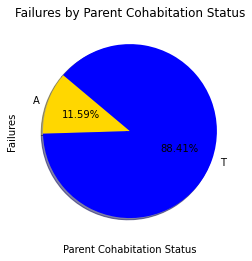

In [19]:
#Display the percentages with at least 1 failure from each Parent Cohabitation Status type
colors = ["gold","blue"]
p_Status_groups = mergeddata.groupby('Pstatus')

failure_num = p_Status_groups['failures'].count()

Pstatus_chart = failure_num.plot(kind="pie", title="Failures by Parent Cohabitation Status",  autopct="%1.2f%%", colors=colors, shadow=True, startangle=140)

Pstatus_chart.set_xlabel("Parent Cohabitation Status")
Pstatus_chart.set_ylabel("Failures")

plt.show()
